<a href="https://colab.research.google.com/github/mohamadkz/vgg16/blob/main/vgg_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

# Then move kaggle.json into the folder where the API expects to find it.
# !mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from zipfile import ZipFile
import os,glob
import cv2
from keras.preprocessing.image import ImageDataGenerator
from tqdm._tqdm_notebook import tqdm_notebook as tqdm
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Convolution2D, Dropout, Dense,MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from zipfile import ZipFile
from keras.callbacks import EarlyStopping,ModelCheckpoint

<ipython-input-3-15232cb0a18a>:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.*` instead of `tqdm._tqdm_notebook.*`
  from tqdm._tqdm_notebook import tqdm_notebook as tqdm


In [ ]:
# file_name = "/content/brain-mri-images-for-brain-tumor-detection.zip"
# file_name = "/content/drive/MyDrive/brain_img/new_data.zip"
# with ZipFile(file_name,'r') as zip:
#   zip.extractall()
#   print('Done')

In [ ]:
!unzip '/content/drive/MyDrive/brain_img/new_data.zip'

Archive:  /content/drive/MyDrive/brain_img/new_data.zip
   creating: new_data/no/
  inflating: new_data/no/no0.jpg     
  inflating: new_data/no/no1.jpg     
  inflating: new_data/no/no10.jpg    
  inflating: new_data/no/no100.jpg   
  inflating: new_data/no/no1000.jpg  
  inflating: new_data/no/no1001.jpg  
  inflating: new_data/no/no1002.jpg  
  inflating: new_data/no/no1003.jpg  
  inflating: new_data/no/no1004.jpg  
  inflating: new_data/no/no1005.jpg  
  inflating: new_data/no/no1006.jpg  
  inflating: new_data/no/no1007.jpg  
  inflating: new_data/no/no1008.jpg  
  inflating: new_data/no/no1009.jpg  
  inflating: new_data/no/no101.jpg   
  inflating: new_data/no/no1010.jpg  
  inflating: new_data/no/no1011.jpg  
  inflating: new_data/no/no1012.jpg  
  inflating: new_data/no/no1013.jpg  
  inflating: new_data/no/no1014.jpg  
  inflating: new_data/no/no1015.jpg  
  inflating: new_data/no/no1016.jpg  
  inflating: new_data/no/no1017.jpg  
  inflating: new_data/no/no1018.jpg  
  infl

In [ ]:
# os.chdir('/content/yes')
# os.chdir('/content/new_data/yes')
# X = []
# y = []
# for i in tqdm(os.listdir()):
#       img = cv2.imread(i)
#       img = cv2.resize(img,(224,224))
#       X.append(img)
      # y.append((i[0:1]))
      # y.append('Y')
# os.chdir('/content/no')
# os.chdir('/content/new_data/no')
# for i in tqdm(os.listdir()):
#       img = cv2.imread(i)
#       img = cv2.resize(img,(224,224))
#       X.append(img)
# for i in range(1,99):
#     y.append('N')
#       y.append('N')
# print(y)

In [ ]:
!pip install split-folders

In [ ]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 10))
# for i in range(4):
#     plt.subplot(1, 4, i+1)
#     plt.imshow(X[i], cmap="gray")
#     plt.axis('off')
# plt.show()

In [ ]:
import splitfolders
splitfolders.ratio("/content/new_data", output="output", seed=1337, ratio=(.8, 0.1,0.1))

Copying files: 3000 files [00:00, 4309.72 files/s]


In [ ]:
# xha=np.array(X)
# yha=np.array(y)

# xha.shape
# yha.shape
# print("X Shape: ", xha.shape)
# print("y Shape: ", yha.shape)

In [ ]:
train_path="/content/output/train"
val_path="/content/output/val"
test_path="/content/output/test"
class_names=os.listdir(train_path)
class_names_test=os.listdir(test_path)

list = os.listdir("/content/output/train/yes") + os.listdir("/content/output/train/no") # dir is your directory path
Total_Traindata = len(list)

list = os.listdir("/content/output/val/yes") + os.listdir("/content/output/val/no") # dir is your directory path
Total_Valdata = len(list)

list = os.listdir("/content/output/test/no") + os.listdir("/content/output/test/no") # dir is your directory path
Total_Testdata = len(list)

print (Total_Traindata)
print (Total_Valdata)
print (Total_Testdata)

2400
300
300


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# print ("Shape of an image in X_train: ", X_train[0].shape)
# print ("Shape of an image in X_test: ", X_test[0].shape)

In [ ]:
# le = preprocessing.LabelEncoder()
# y_train = le.fit_transform(y_train)
# y_test = le.fit_transform(y_test)
# y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
# y_test = tf.keras.utils.to_categorical(y_test, num_classes=2)
# y_train = np.array(y_train)
# X_train = np.array(X_train)
# y_test = np.array(y_test)
# X_test = np.array(X_test)

In [ ]:
# print("X_train Shape: ", X_train.shape)
# print("X_test Shape: ", X_test.shape)
# print("y_train Shape: ", y_train.shape)
# print("y_test Shape: ", y_test.shape)

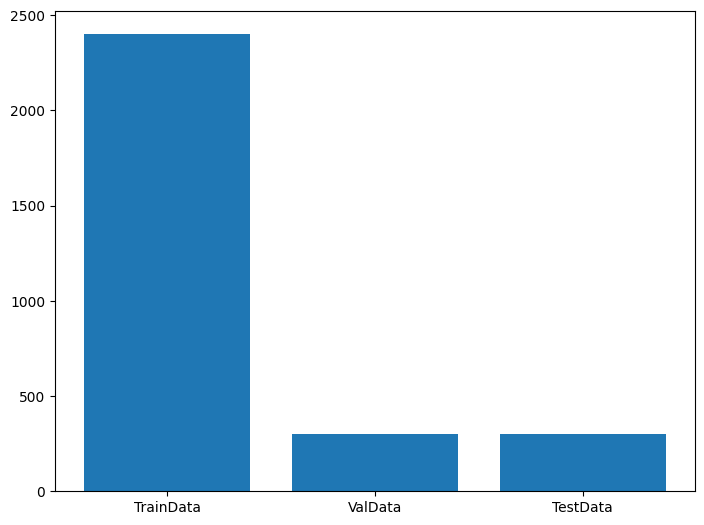

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['TrainData', 'ValData', 'TestData']
Data = [Total_Traindata,Total_Valdata,Total_Testdata ]
ax.bar(langs,Data)
plt.show()

In [ ]:
labels = []
for i in os.listdir(train_path):
    labels+=[i]

In [ ]:
labels

['yes', 'no']

In [ ]:
import random
import matplotlib.image as mpimg
def load_random_imgs_from_folder(folder,label):
  plt.figure(figsize=(15,15))
  for i in range(3):
    file = random.choice(os.listdir(folder))
    image_path = os.path.join(folder, file)
    img=mpimg.imread(image_path)
    ax=plt.subplot(1,3,i+1)
    ax.title.set_text(label)
    plt.xlabel(f'Name: {file}')
    plt.imshow(img)

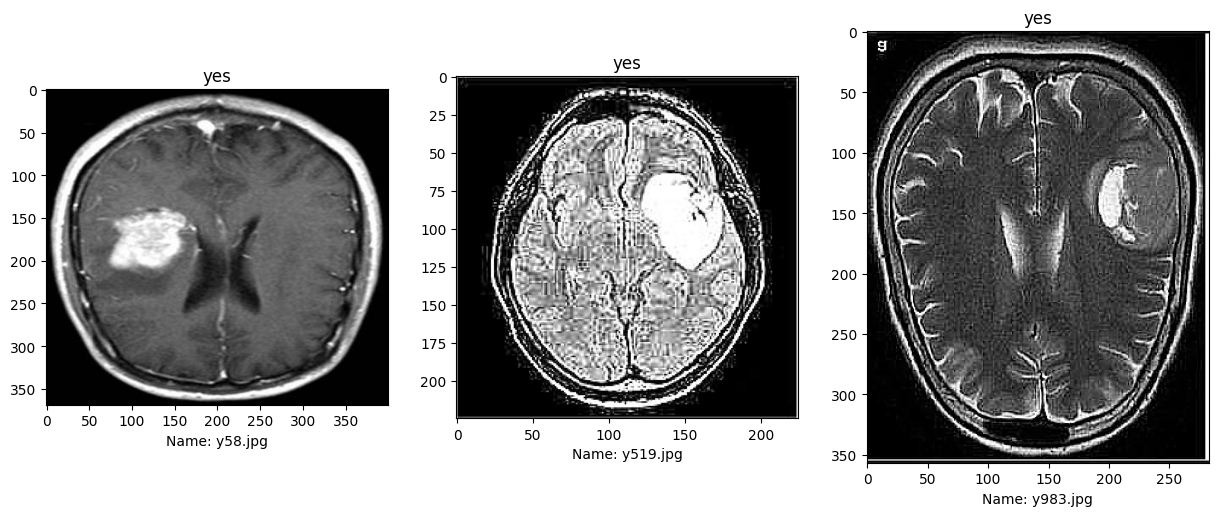

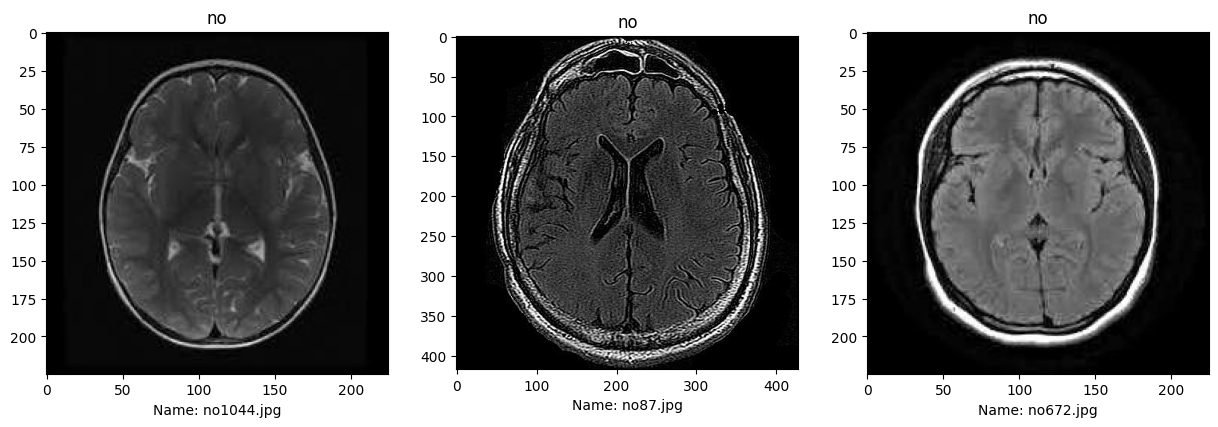

In [ ]:
data_dir = "/content/new_data"
for label in labels:
    load_random_imgs_from_folder(f"{data_dir}/{label}",label)

In [ ]:
train_datagen = ImageDataGenerator(zoom_range=0.15,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.15)
test_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(train_path,target_size=(224, 224),batch_size=32,shuffle=True,class_mode='binary')
val_generator = val_datagen.flow_from_directory(val_path,target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')

test_generator = test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,shuffle=False,class_mode='binary')

Found 2400 images belonging to 2 classes.
Found 300 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [ ]:
# train_generator.class_indices
# val_generator.class_indices
# test_generator.class_indices

In [ ]:
from keras.applications import vgg16


img_rows, img_cols = 224, 224


vgg = vgg16.VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (img_rows, img_cols, 3))

# Here we freeze the last 4 layers
# Layers are set to trainable as True by default
for layer in vgg.layers:
    layer.trainable = False

# Let's print our layers
for (i,layer) in enumerate(vgg.layers):
    print(str(i) + " "+ layer.__class__.__name__, layer.trainable)

58889256/58889256 [==============================] - 2s 0us/step
0 InputLayer False
1 Conv2D False
2 Conv2D False
3 MaxPooling2D False
4 Conv2D False
5 Conv2D False
6 MaxPooling2D False
7 Conv2D False
8 Conv2D False
9 Conv2D False
10 MaxPooling2D False
11 Conv2D False
12 Conv2D False
13 Conv2D False
14 MaxPooling2D False
15 Conv2D False
16 Conv2D False
17 Conv2D False
18 MaxPooling2D False


In [ ]:
 def lw(bottom_model, num_classes):
    """creates the top or head of the model that will be
    placed ontop of the bottom layers"""

    top_model = bottom_model.output
    top_model = GlobalAveragePooling2D()(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(1024,activation='relu')(top_model)
    top_model = Dense(512,activation='relu')(top_model)
    # top_model = Dense(num_classes,activation='softmax')(top_model)
    top_model = Dense(num_classes,activation='sigmoid')(top_model)
    return top_model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

from keras.models import Model


# num_classes = 2

num_classes = 1

FC_Head = lw(vgg, num_classes)

model = Model(inputs = vgg.input, outputs = FC_Head)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
metrics = [
    tf.keras.metrics.TruePositives(name='tp'),tf.keras.metrics.FalsePositives(name='fp'),
    tf.keras.metrics.TrueNegatives(name='tn'),tf.keras.metrics.FalseNegatives(name='fn'),
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),tf.keras.metrics.AUC(name='auc'),
    tf.keras.metrics.AUC(name='prc', curve='PR'),
    tf.keras.metrics.F1Score(name='f1_score'),

]

In [ ]:
from tensorflow.keras.models import Model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss = 'binary_crossentropy',metrics = metrics)
# model.compile(optimizer='adam', loss = 'binary_crossentropy',metrics = metrics)

In [ ]:
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('/content/best_model.h5', monitor='accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# history = model.fit(X_train,y_train,
#                     epochs=5,
#                     validation_data=(X_test,y_test),
#                     verbose = 1,
#                     initial_epoch=0)


In [ ]:
history = model.fit(train_generator,
                    validation_data = val_generator,
                    epochs = 15,
                    verbose = 1, callbacks=[mc,es]
                    )

Epoch 1/15
75/75 [==============================] - ETA: 0s - loss: 0.7244 - tp: 995.0000 - fp: 219.0000 - tn: 981.0000 - fn: 205.0000 - accuracy: 0.8233 - precision: 0.8196 - recall: 0.8292 - auc: 0.8865 - prc: 0.8566 - f1_score: 0.6667
Epoch 1: accuracy improved from -inf to 0.82333, saving model to /content/best_model.h5
75/75 [==============================] - 71s 685ms/step - loss: 0.7244 - tp: 995.0000 - fp: 219.0000 - tn: 981.0000 - fn: 205.0000 - accuracy: 0.8233 - precision: 0.8196 - recall: 0.8292 - auc: 0.8865 - prc: 0.8566 - f1_score: 0.6667 - val_loss: 0.2404 - val_tp: 132.0000 - val_fp: 9.0000 - val_tn: 141.0000 - val_fn: 18.0000 - val_accuracy: 0.9100 - val_precision: 0.9362 - val_recall: 0.8800 - val_auc: 0.9701 - val_prc: 0.9727 - val_f1_score: 0.6667


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/15
75/75 [==============================] - ETA: 0s - loss: 0.1507 - tp: 1127.0000 - fp: 68.0000 - tn: 1132.0000 - fn: 73.0000 - accuracy: 0.9413 - precision: 0.9431 - recall: 0.9392 - auc: 0.9856 - prc: 0.9854 - f1_score: 0.6669
Epoch 2: accuracy improved from 0.82333 to 0.94125, saving model to /content/best_model.h5
75/75 [==============================] - 38s 512ms/step - loss: 0.1507 - tp: 1127.0000 - fp: 68.0000 - tn: 1132.0000 - fn: 73.0000 - accuracy: 0.9413 - precision: 0.9431 - recall: 0.9392 - auc: 0.9856 - prc: 0.9854 - f1_score: 0.6669 - val_loss: 0.1654 - val_tp: 136.0000 - val_fp: 7.0000 - val_tn: 143.0000 - val_fn: 14.0000 - val_accuracy: 0.9300 - val_precision: 0.9510 - val_recall: 0.9067 - val_auc: 0.9872 - val_prc: 0.9874 - val_f1_score: 0.6696
Epoch 3/15
75/75 [==============================] - ETA: 0s - loss: 0.1125 - tp: 1152.0000 - fp: 55.0000 - tn: 1145.0000 - fn: 48.0000 - accuracy: 0.9571 - precision: 0.9544 - recall: 0.9600 - auc: 0.9913 - prc: 0.9917

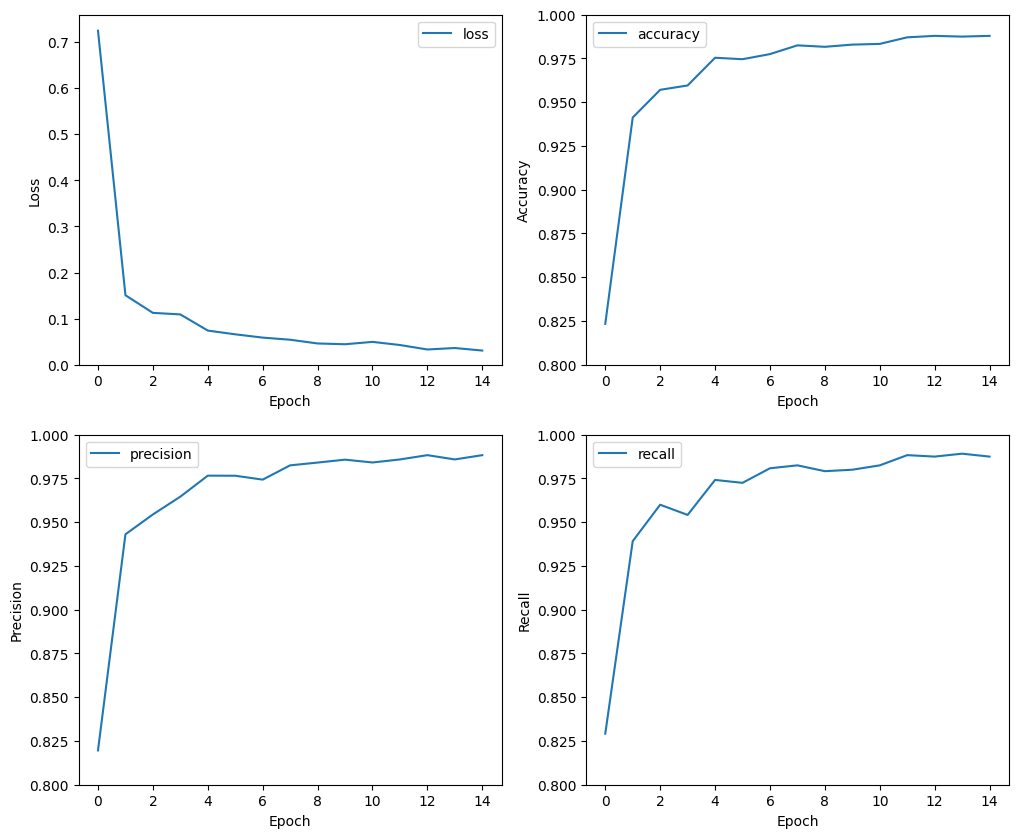

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
def plot_metrics(history):
  metrics = ['loss', 'accuracy', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label=metric)
    # plt.plot(history.epoch, history.history['val_'+metric], color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.7,1])
    else:
      plt.ylim([0.8,1])

    plt.legend();
plot_metrics(history)

In [ ]:
validation_results = model.evaluate(val_generator, verbose=0)

for name, value in zip(model.metrics_names, validation_results):
  print(name, ': ', value)

loss :  0.11163713783025742
tp :  145.0
fp :  3.0
tn :  147.0
fn :  5.0
accuracy :  0.9733333587646484
precision :  0.9797297120094299
recall :  0.9666666388511658
auc :  0.9933999180793762
prc :  0.9946648478507996
f1_score :  [0.6944444]


10/10 [==============================] - 1s 121ms/step
Non-tumor detected (True Negatives):  147
Non-tumor incorrectly detected (False Positives):  3
Tumor missed (False Negatives):  5
Tumor detected (True Positives):  145
Total case:  150


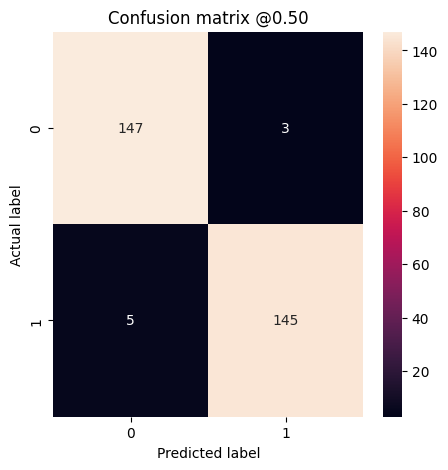

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Non-tumor detected (True Negatives): ', cm[0][0])
  print('Non-tumor incorrectly detected (False Positives): ', cm[0][1])
  print('Tumor missed (False Negatives): ', cm[1][0])
  print('Tumor detected (True Positives): ', cm[1][1])
  print('Total case: ', np.sum(cm[1]))

validation_predictions = model.predict(val_generator)

labels = val_generator.labels

plot_cm(labels, validation_predictions)

In [ ]:
# import matplotlib.pyplot as plt
# %matplotlib inline
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']
# epochs = range(len(acc))

In [ ]:
# plt.plot(epochs, acc, 'r', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend(loc=0)
# plt.figure()

# plt.show()

In [ ]:
# plt.plot(epochs, loss, 'r', label='loss')
# plt.plot(epochs, val_loss, 'b', label='Val_loss')
# plt.title('loss and val_loss')
# plt.legend(loc=0)
# plt.figure()

# plt.show()

In [ ]:
from tensorflow.keras.models import load_model

model.save('/content/final.h5')
load_model = load_model("/content/final.h5")


# %load_ext tensorboard

# %tensorboard --logdir final --port 6008

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from PIL import Image
import numpy as np

image = cv2.imread("/content/output/test/no/no817.jpg")

image_fromarray = Image.fromarray(image, "RGB")
resize_image = image_fromarray.resize((224,224))
expand_input = np.expand_dims(resize_image, axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = load_model.predict(input_data)
if pred[0][0] >= 0.5:
  print("yes")
else:
  print("no")

1/1 [==============================] - 1s 1s/step
no


In [ ]:
# print(pred)
# output_class = class_names[np.argmax(pred)]
# predicted_label = np.argmax(pred)
# if predicted_label == 0:
#   print("yes")
# else:
#   print("no")
# print("The predicted class is", output_class)